Your tasks are as follows:
1. Join the data from Part 1 with the data from Part 2 to create a new dataframe.
2. Use data visualization to explore the data. Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.
3. Create your own SQLite database and store the data you've collected on the POIs. **Put some thought into the structure of your database**. **Validate your data**. (Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)).

Complete the joining_data.ipynb notebook to demonstrate how you executed the tasks above.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# A - Join the data 

In [2]:
# Load bike stations data 
df1 = pd.read_csv('../data/NewYork_BikeStations.csv')
df1.head(3)

,Name_Station,Latitude_Station,Longitude_Station,Number_Of_Bikes
0,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16
1,"Icon Pkg: W 29 St, 11th Ave & 10th Ave",40.752384,-74.003960,13
2,"Icon Pkg: E 27 St, 2nd Ave & 3rd Ave",40.740531,-73.979577,20


In [3]:
# Load POIs data 
df2 = pd.read_csv('../data/nearby_venues_YELP.csv')
df2.head(3)

,Name_Station,Venue_Name,Venue_Address,Venue_Distance,Venue_Phone,Venue_Rating,Venue_Price,Venue_Review_Count,Venue_URL,Venue_Subcategory,Venue_Category
0,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",Village Crown Kosher Catering,216 E 49th St,401.379171,(212) 207-3888,4.9,$$,9,http://www.villagecrown.com,Caterers,restaurant
1,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",Charoen Krung,955 2nd Ave,227.252387,(929) 789-9456,4.8,$$,121,http://www.charoenkrungnyc.com,Thai,restaurant
2,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",Quick Stop,47th Street & Lexington Ave,672.822715,(917) 577-7057,4.8,$,9,http://georzes.wix.com/quickshop1,Coffee & Tea,restaurant


In [4]:
# Join data
df_joined = pd.merge(df1, df2, on='Name_Station', how='left')
df_joined.head()

,Name_Station,Latitude_Station,Longitude_Station,Number_Of_Bikes,Venue_Name,Venue_Address,Venue_Distance,Venue_Phone,Venue_Rating,Venue_Price,Venue_Review_Count,Venue_URL,Venue_Subcategory,Venue_Category
0,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Village Crown Kosher Catering,216 E 49th St,401.379171,(212) 207-3888,4.9,$$,9,http://www.villagecrown.com,Caterers,restaurant
1,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Charoen Krung,955 2nd Ave,227.252387,(929) 789-9456,4.8,$$,121,http://www.charoenkrungnyc.com,Thai,restaurant
2,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Quick Stop,47th Street & Lexington Ave,672.822715,(917) 577-7057,4.8,$,9,http://georzes.wix.com/quickshop1,Coffee & Tea,restaurant
3,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Kati Shop,162 E 55th St,495.560320,(646) 869-1362,4.7,$$,212,http://www.katishopnyc.com,Thai,restaurant
4,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Tony's Coffee Cart,"Sw Corner, 49th St & Park Ave",732.206967,NaN,4.7,$,7,NaN,Coffee & Tea,restaurant


In [5]:
# Check shape (number of rows and columns)
print('Shape of bike_station data is', df1.shape)
print('Shape of poi data is', df2.shape)
print('Shape of data after joining 2 above data is',df_joined.shape)

Shape of bike_station data is (37, 4)
Shape of poi data is (5259, 11)
Shape of data after joining 2 above data is (5259, 14)


In [6]:
# Checking if the join worked correctly
print('Difference of number of bike stations between before after joining:', df1.shape[0] - len(df_joined['Name_Station'].unique()))
print('Difference of number of POIs between before after joining:', df2.shape[0] - df_joined.shape[0])

Difference of number of bike stations between before after joining: 0
Difference of number of POIs between before after joining: 0


#

# B - EDA

## 1. Take a preliminary look to get a brief overview of the dataset 

In [7]:
print(f'The DataFrame contains {df_joined.shape[0]} rows, {df_joined.shape[1]} columns.')

The DataFrame contains 5259 rows, 14 columns.


In [8]:
df_joined.columns

Index(['Name_Station', 'Latitude_Station', 'Longitude_Station',
       'Number_Of_Bikes', 'Venue_Name', 'Venue_Address', 'Venue_Distance',
       'Venue_Phone', 'Venue_Rating', 'Venue_Price', 'Venue_Review_Count',
       'Venue_URL', 'Venue_Subcategory', 'Venue_Category'],
      dtype='object')

In [9]:
df_joined.nunique()

Name_Station            37
Latitude_Station        37
Longitude_Station       37
Number_Of_Bikes         13
Venue_Name            1570
Venue_Address         1564
Venue_Distance        4774
Venue_Phone           1515
Venue_Rating            37
Venue_Price              5
Venue_Review_Count     545
Venue_URL             1375
Venue_Subcategory      218
Venue_Category          13
dtype: int64

In [10]:
# df_joined.dtypes

In [11]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5259 entries, 0 to 5258
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name_Station        5259 non-null   object 
 1   Latitude_Station    5259 non-null   float64
 2   Longitude_Station   5259 non-null   float64
 3   Number_Of_Bikes     5259 non-null   int64  
 4   Venue_Name          5259 non-null   object 
 5   Venue_Address       5185 non-null   object 
 6   Venue_Distance      5259 non-null   float64
 7   Venue_Phone         4924 non-null   object 
 8   Venue_Rating        5259 non-null   float64
 9   Venue_Price         5259 non-null   object 
 10  Venue_Review_Count  5259 non-null   int64  
 11  Venue_URL           4587 non-null   object 
 12  Venue_Subcategory   5259 non-null   object 
 13  Venue_Category      5259 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 575.3+ KB


###

## 2. Explore data by descriptive statistics/ summary statistics/ numerical summaries 

In [12]:
# For numerical data
df_joined.describe()

,Latitude_Station,Longitude_Station,Number_Of_Bikes,Venue_Distance,Venue_Rating,Venue_Review_Count
count,5259.000000,5259.000000,5259.000000,5259.000000,5259.000000,5259.000000
mean,40.754354,-73.981257,12.441339,846.314944,4.243582,244.330481
std,0.020391,0.017794,5.442473,2740.220021,0.566806,528.944188
min,40.705924,-74.014294,2.000000,12.299440,1.000000,1.000000
25%,40.740575,-73.993210,9.000000,467.977388,4.100000,30.000000
50%,40.755487,-73.982600,12.000000,717.749655,4.400000,105.000000
75%,40.764649,-73.968405,14.000000,933.062515,4.600000,255.000000
max,40.794416,-73.943185,32.000000,133433.327873,5.000000,9704.000000


In [13]:
# For categorical data
df_joined.describe(include='object')

,Name_Station,Venue_Name,Venue_Address,Venue_Phone,Venue_Price,Venue_URL,Venue_Subcategory,Venue_Category
count,5259,5259,5185,4924,5259,4587,5259,5259
unique,37,1570,1564,1515,5,1375,218,13
top,"Icon Pkg: W 43 St, 8th Ave & 7th Ave",Trader Joe's,983 1st Ave,(855) 816-6193,$$,https://locations.traderjoes.com,Hotels,restaurant
freq,170,33,22,36,3047,24,609,740


## Comment:
- It seems like there is no invalid values in the dataset.
- However, we can see maximum value for `Venue_Distance` is **133433 meters**, while we request radius=1000m in part 3. ---> According to API documentation, 'radius' parameter is just a suggested search radius (is used as a suggestion to the search) and the actual search radius depends on area's density.

In [14]:
# Try to check for if having really invalid values for Rating:

invalid_values = df_joined[(df_joined['Venue_Rating'] < 0) | (df_joined['Venue_Rating'] > 5)]
if invalid_values.empty == True:
    print("No invalid values in 'Venue_Rating' column of the joined DataFrame.")
else:
    invalid_values

No invalid values in 'Venue_Rating' column of the joined DataFrame.


###

## 3. Data Wrangling: Cleaning and Transforming data

### 3.1. Duplicates

In [15]:
# Check for duplicated rows
df_joined.duplicated().sum()     

0

**Result**: Data has no duplicated rows.

### 3.2. Missing values

In [16]:
# Check for missing values
df_joined.isnull().any().sum()    

3

**Result**: Data has 3 features having null values.

In [17]:
df_joined.isnull().sum()

Name_Station            0
Latitude_Station        0
Longitude_Station       0
Number_Of_Bikes         0
Venue_Name              0
Venue_Address          74
Venue_Distance          0
Venue_Phone           335
Venue_Rating            0
Venue_Price             0
Venue_Review_Count      0
Venue_URL             672
Venue_Subcategory       0
Venue_Category          0
dtype: int64

In [18]:
# List features having null values along with its percentage
ser_null = df_joined.isnull().sum()
totalrows = df_joined.shape[0]
ser_percent = round(ser_null/totalrows*100,2)
df_null = pd.concat([ser_null, ser_percent], axis=1, keys=['TotalNulls', 'Percent %']).sort_values(by='Percent %', ascending=False)
df_null = df_null[df_null['TotalNulls']>0]
df_null

,TotalNulls,Percent %
Venue_URL,672,12.78
Venue_Phone,335,6.37
Venue_Address,74,1.41


### **My solution**: 
Based on above result and my thought for further analysis, I decide with:
#### _For analysis purpose_: `df`
1. 'Venue_URL' column:  replace NaN with 0 (means 'No'- has no menu); otherwise with 1 (means 'Yes'- has menu) INSTEAD OF DELETING THE WHOLE COLUMN.
2. 'Venue_Phone' column: solution is similar to 'Venue_URL' column
3. 'Venue_Address' columns: solution is similar to 'Venue_URL' column INSTEAD OF DELETING rows containing NaN values in this column.

***It's possible that these variables (Venue_URL,Venue_Phone,Venue_Address) have no effect on the model, but I'm not sure, so I decided to keep  them instead of deleting these variables at this moment. The matter of considering actually keeping them or deleting them for modelling is left for later.***

#### **however,** 
#### _For database purpose_: `df_joined`
- I want to keep `df_joined` original (**keep detailed information I've collected on the POIs**) in order to put it into SQLite3 database in Section C.
- Therefore, I'm going to handle missing values by replacing them with the word "Empty" rather than deleting them or encoding as above.
- Please see my solution as follows:

#####

In [19]:
df = df_joined.copy()  # keep df_joined original

#### Handle missing values For database purpose:

In [20]:
df_joined.fillna('Empty', inplace=True)

# Check for missing values again
df_joined.isnull().any().sum()   

0

#### Handle missing values For analysis purpose:

In [21]:
df['Venue_URL'] = df['Venue_URL'].apply(lambda x: 1 if 'http' in str(x) else x)
df['Venue_URL'] = df['Venue_URL'].fillna(0)

df['Venue_Phone'] = df['Venue_Phone'].fillna(0)
df['Venue_Phone'] = df['Venue_Phone'].apply(lambda x: 1  if x!=0  else x)


df['Venue_Address'] = df['Venue_Address'].fillna(0)
df['Venue_Address'] = df['Venue_Address'].apply(lambda x: 1  if x!=0  else x)

In [22]:
df['Venue_URL'].value_counts()

Venue_URL
1.0    4587
0.0     672
Name: count, dtype: int64

In [23]:
df['Venue_Phone'].value_counts()

Venue_Phone
1    4924
0     335
Name: count, dtype: int64

In [24]:
df['Venue_Address'].value_counts()

Venue_Address
1    5185
0      74
Name: count, dtype: int64

In [25]:
# Check for missing values again
df.isnull().sum()

Name_Station          0
Latitude_Station      0
Longitude_Station     0
Number_Of_Bikes       0
Venue_Name            0
Venue_Address         0
Venue_Distance        0
Venue_Phone           0
Venue_Rating          0
Venue_Price           0
Venue_Review_Count    0
Venue_URL             0
Venue_Subcategory     0
Venue_Category        0
dtype: int64

In [26]:
# Check data shape again df and df_joined
print("Shape of DataFrame df_joined:", df_joined.shape)
print("Shape of DataFrame df       :", df.shape)

Shape of DataFrame df_joined: (5259, 14)
Shape of DataFrame df       : (5259, 14)


######

### 3.3. Format and Change data types

In [27]:
df['Venue_Price'].value_counts()

Venue_Price
$$      3047
$$$      961
$        885
$$$$     363
££         3
Name: count, dtype: int64

In [28]:
# price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
# df['Venue_Price'] = df['Venue_Price'].map(price_mapping)

df['Venue_Price'].replace({'$': 1, '$$': 2, '$$$': 3,  '$$$$': 4, '££':5}, inplace=True)

In [29]:
# df.info()

Even though `Venue_URL`,`Venue_Phone`, `Venue_Address`and `Venue_Price` columns have values 0/1... (integer), they present numeric but theirs essence is categorical data type.

In [30]:
# Change data types
df['Venue_URL'] = df['Venue_URL'].astype('object')
df['Venue_Phone'] = df['Venue_Phone'].astype('object')
df['Venue_Address'] = df['Venue_Address'].astype('object')
df['Venue_Price'] = df['Venue_Price'].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5259 entries, 0 to 5258
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name_Station        5259 non-null   object 
 1   Latitude_Station    5259 non-null   float64
 2   Longitude_Station   5259 non-null   float64
 3   Number_Of_Bikes     5259 non-null   int64  
 4   Venue_Name          5259 non-null   object 
 5   Venue_Address       5259 non-null   object 
 6   Venue_Distance      5259 non-null   float64
 7   Venue_Phone         5259 non-null   object 
 8   Venue_Rating        5259 non-null   float64
 9   Venue_Price         5259 non-null   object 
 10  Venue_Review_Count  5259 non-null   int64  
 11  Venue_URL           5259 non-null   object 
 12  Venue_Subcategory   5259 non-null   object 
 13  Venue_Category      5259 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 575.3+ KB


In [31]:
df.head()

,Name_Station,Latitude_Station,Longitude_Station,Number_Of_Bikes,Venue_Name,Venue_Address,Venue_Distance,Venue_Phone,Venue_Rating,Venue_Price,Venue_Review_Count,Venue_URL,Venue_Subcategory,Venue_Category
0,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Village Crown Kosher Catering,1,401.379171,1,4.9,2,9,1.0,Caterers,restaurant
1,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Charoen Krung,1,227.252387,1,4.8,2,121,1.0,Thai,restaurant
2,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Quick Stop,1,672.822715,1,4.8,1,9,1.0,Coffee & Tea,restaurant
3,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Kati Shop,1,495.560320,1,4.7,2,212,1.0,Thai,restaurant
4,"Icon Pkg: E 52 St, 1st Ave & 2nd Ave",40.755226,-73.965826,16,Tony's Coffee Cart,1,732.206967,0,4.7,1,7,0.0,Coffee & Tea,restaurant


###

## 4. Explore data by visualization

In [32]:
numerical_cols = df.select_dtypes(include=['int','float']).columns 
categorical_cols = df.select_dtypes(include='object').columns

num_cols = ['Num_Of_Bikes', 'Venue_Distance', 'Venue_Rating', 'Venue_Review_Count'] # exclude 2 columns: 'Latitude_Station', 'Longitude_Station'
cat_cols = [ 'Venue_Address','Venue_Phone','Venue_Price', 'Venue_URL', 'Venue_Category'] # exclude 2 columns: 'Name_Station', 'Venue_Name', 'Venue_Subcategory'

print(numerical_cols)
print(len(numerical_cols))
print(categorical_cols)
print(len(categorical_cols))

Index(['Latitude_Station', 'Longitude_Station', 'Number_Of_Bikes',
       'Venue_Distance', 'Venue_Rating', 'Venue_Review_Count'],
      dtype='object')
6
Index(['Name_Station', 'Venue_Name', 'Venue_Address', 'Venue_Phone',
       'Venue_Price', 'Venue_URL', 'Venue_Subcategory', 'Venue_Category'],
      dtype='object')
8


### 4.1. Univariate exploration 

#### 4.1.1. Numerical

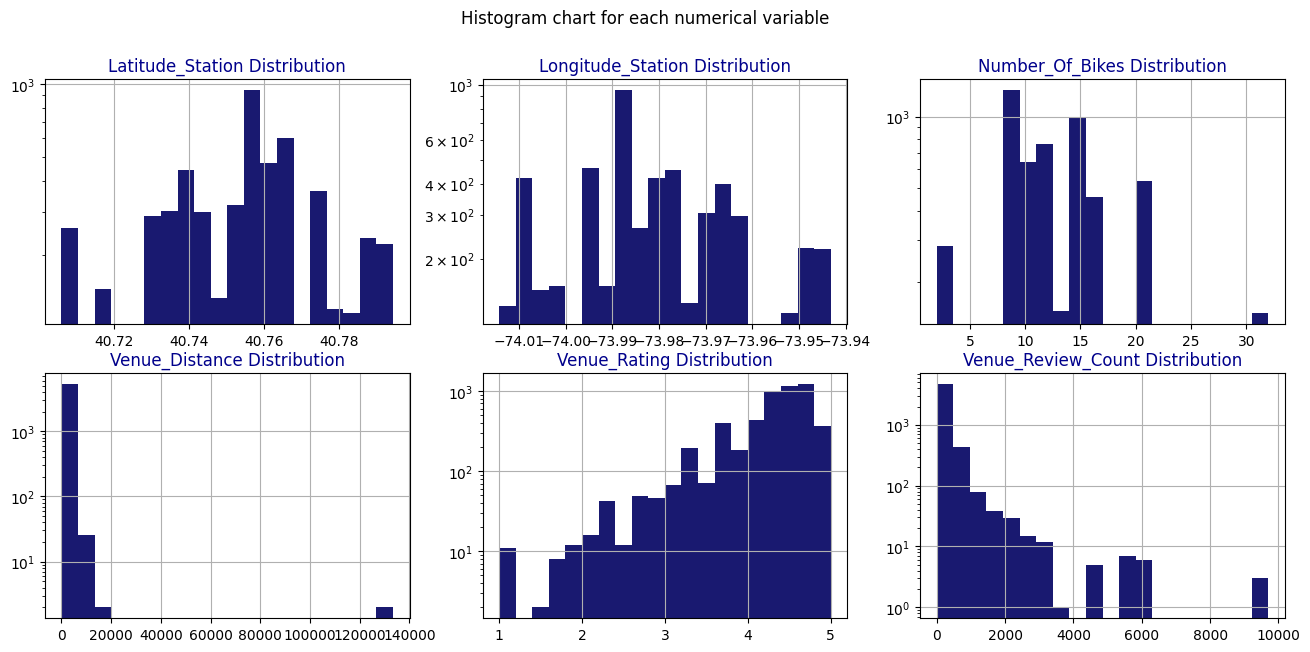

In [33]:
def draw_histograms_univariate(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(16,7))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkBlue')
        ax.set_yscale('log')
    plt.suptitle("Histogram chart for each numerical variable")
    plt.show()

# Draw
draw_histograms_univariate(df, numerical_cols, 2, 3)

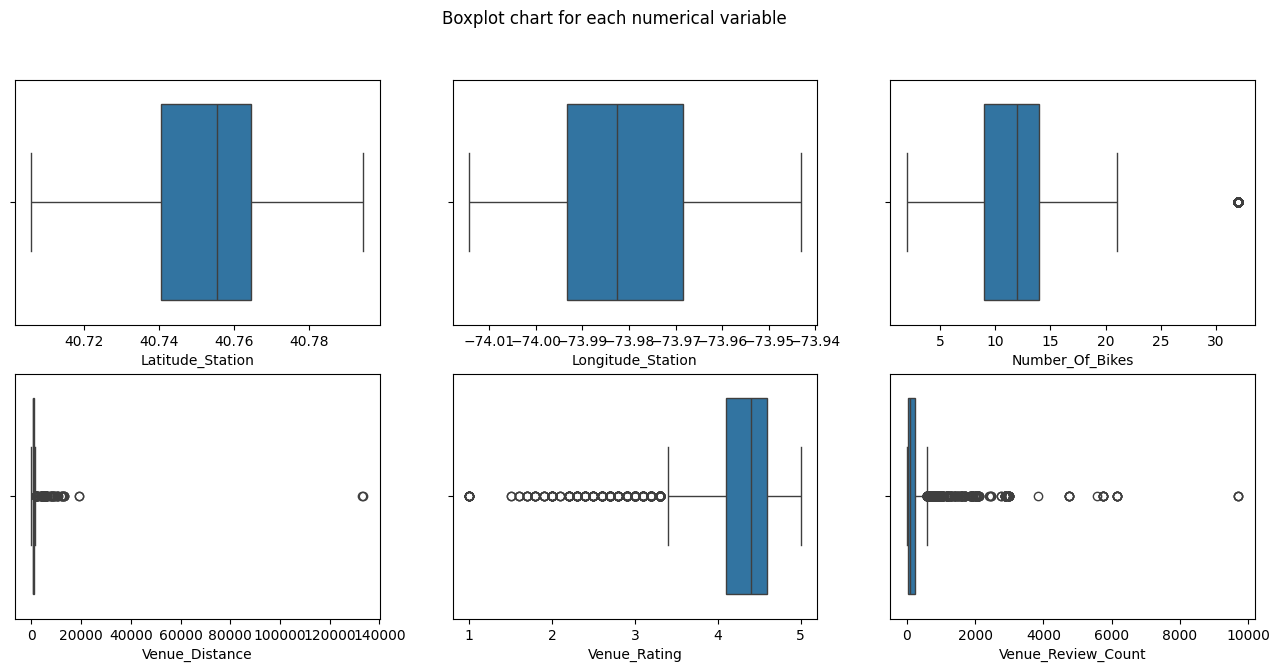

In [34]:
def draw_boxplot_univariate(dataframe, features, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,7))

    for i, feature in enumerate(features):
        row = i // ncols
        col = i % ncols
        ax = axes[row, col]
        sns.boxplot(data=dataframe[feature], orient='h', ax=ax)
    plt.suptitle("Boxplot chart for each numerical variable")
    plt.show()

# Draw   
draw_boxplot_univariate(df, numerical_cols, 2, 3)

### Comment:
According to results from above, there are main points we can notice:
1. `Latitude_Station`:
   - likely symmetric normal distribution.
   - 50% of bike stations is concentrated in from 40.74 to 40.77 latitude.
2. `Longitude_Station`:
   - likely symmetric normal distribution
   - 50% of bike stations is concentrated in from -73.99 to -73.97 longitude.
3. `Num_Of_Bikes`:
   - likely right skewed distribution.
   - 50% of data is concentrated in from 9 to 15.
   - Has 1 outlier (>30) at upper bound.                  ---> **probably need remove**.
4. `Venue_Distance`:
    - extremely right skewed distribution.
    - Most of data is in from 0 to 2000.
    - Has an extremely large outlier at upper bound  ---> **will remove this extreme outlier later (>20000 meters).**
5. `Venue_Rating`:
    - left skewed distribution. Fewer data plots are found to the left of the graph (toward the smaller numeric values).
    - The mean is less than the median.
    - The rating is concentrated at values from 3.5 to 5.
    - 50% of rating is concentrated in from 4 to 4.65.
    - Has some outliers at lower bound.                    ---> **probably remove the extreme outlier later (=1).**
6. `Venue_Review_Count`:
    - right skewed distribution. Fewer data plots are found to the right of the graph (toward the larger numeric values).
    - The mean is greater than the median.
    - Number of reviews is concentrated at values from 0 to 2500.
    - 50% of data is concentrated in from 0 to 300.
    - Has extreme outliers at upper bound.                  ---> **will remove later**
  
**Note: I will decide if should remove outliers or not AFTER my Bivariate Exploration between Numerical&Numerical variables (section 4.2.3 below).**

####

#### 4.1.2. Categorical

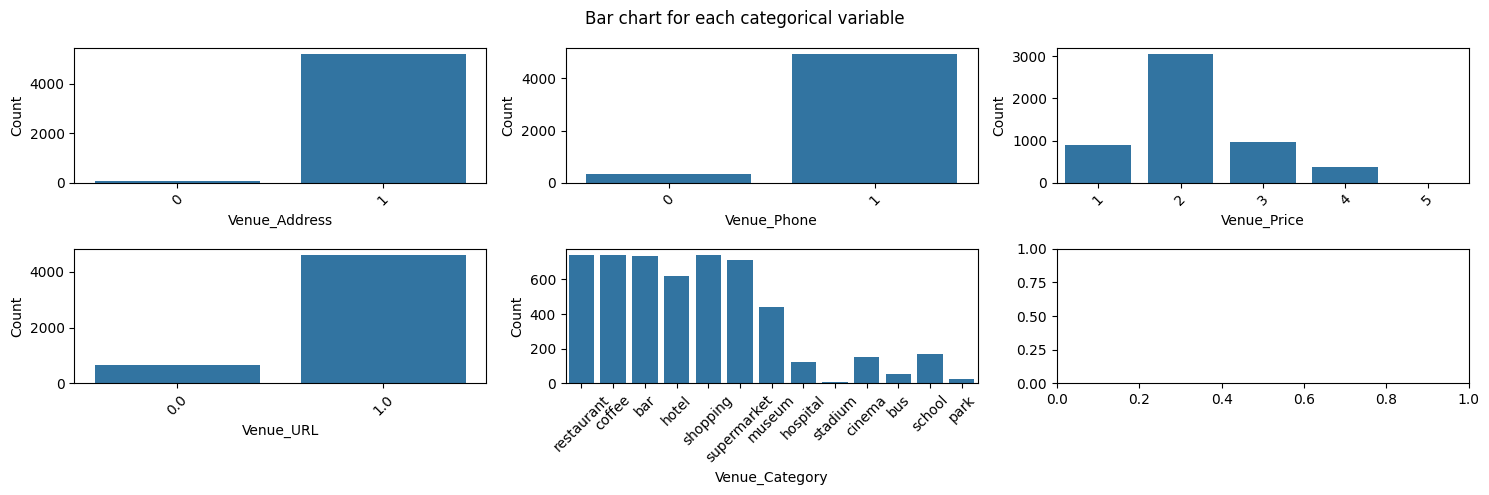

In [35]:
def draw_countplot_univariate(dataframe, features, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5))

    for i, feature in enumerate(features):
        row = i // ncols
        col = i % ncols
        ax = axes[row, col]
        sns.countplot(data=dataframe, x=feature, ax=ax)
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.suptitle("Bar chart for each categorical variable")
    plt.tight_layout()
    plt.show()

# Draw
draw_countplot_univariate(df, cat_cols, 2, 3)

### Comment:
According to results from above, there some are main points we can notice:
1. `Venue_Address`: has 2 types (0-No and 1-Yes). Type 1 is the majority (98,6% data) whereas type 0 is very very rare.
2. `Venue_Phone`: has 2 types (0-No and 1-Yes). Type 1 is the majority (93,6% data) whereas type 0 is very rare.
3. `Venue_URL`: has 2 types (0-No and 1-Yes). Type 1 is popular (87,2%) where as type 0 is rare.
4. `Venue_Price`: has 5 types (1,2,3,4,5 corresponding with levels of price \\$, \\$\\$, \\$\\$$, \$$$$, and very expensive). Type 2 is the most majority (58% data), other types is  less than type 2, specially type 5 is very very rare.
5. `Venue_Category`: has 13 types. Restaurant, coffee, bar, hotel, shopping, suppermarket is likely equal popular; museum accounts for less than the previous types; remaining types are unpopular; and specially stadium is very small.

In [36]:
df['Venue_Price'].value_counts()

Venue_Price
2    3047
3     961
1     885
4     363
5       3
Name: count, dtype: int64

###

### 4.2. 2.	Multivariate exploration 

#### 4.2.1. Bivariate: Categorical & Categorical

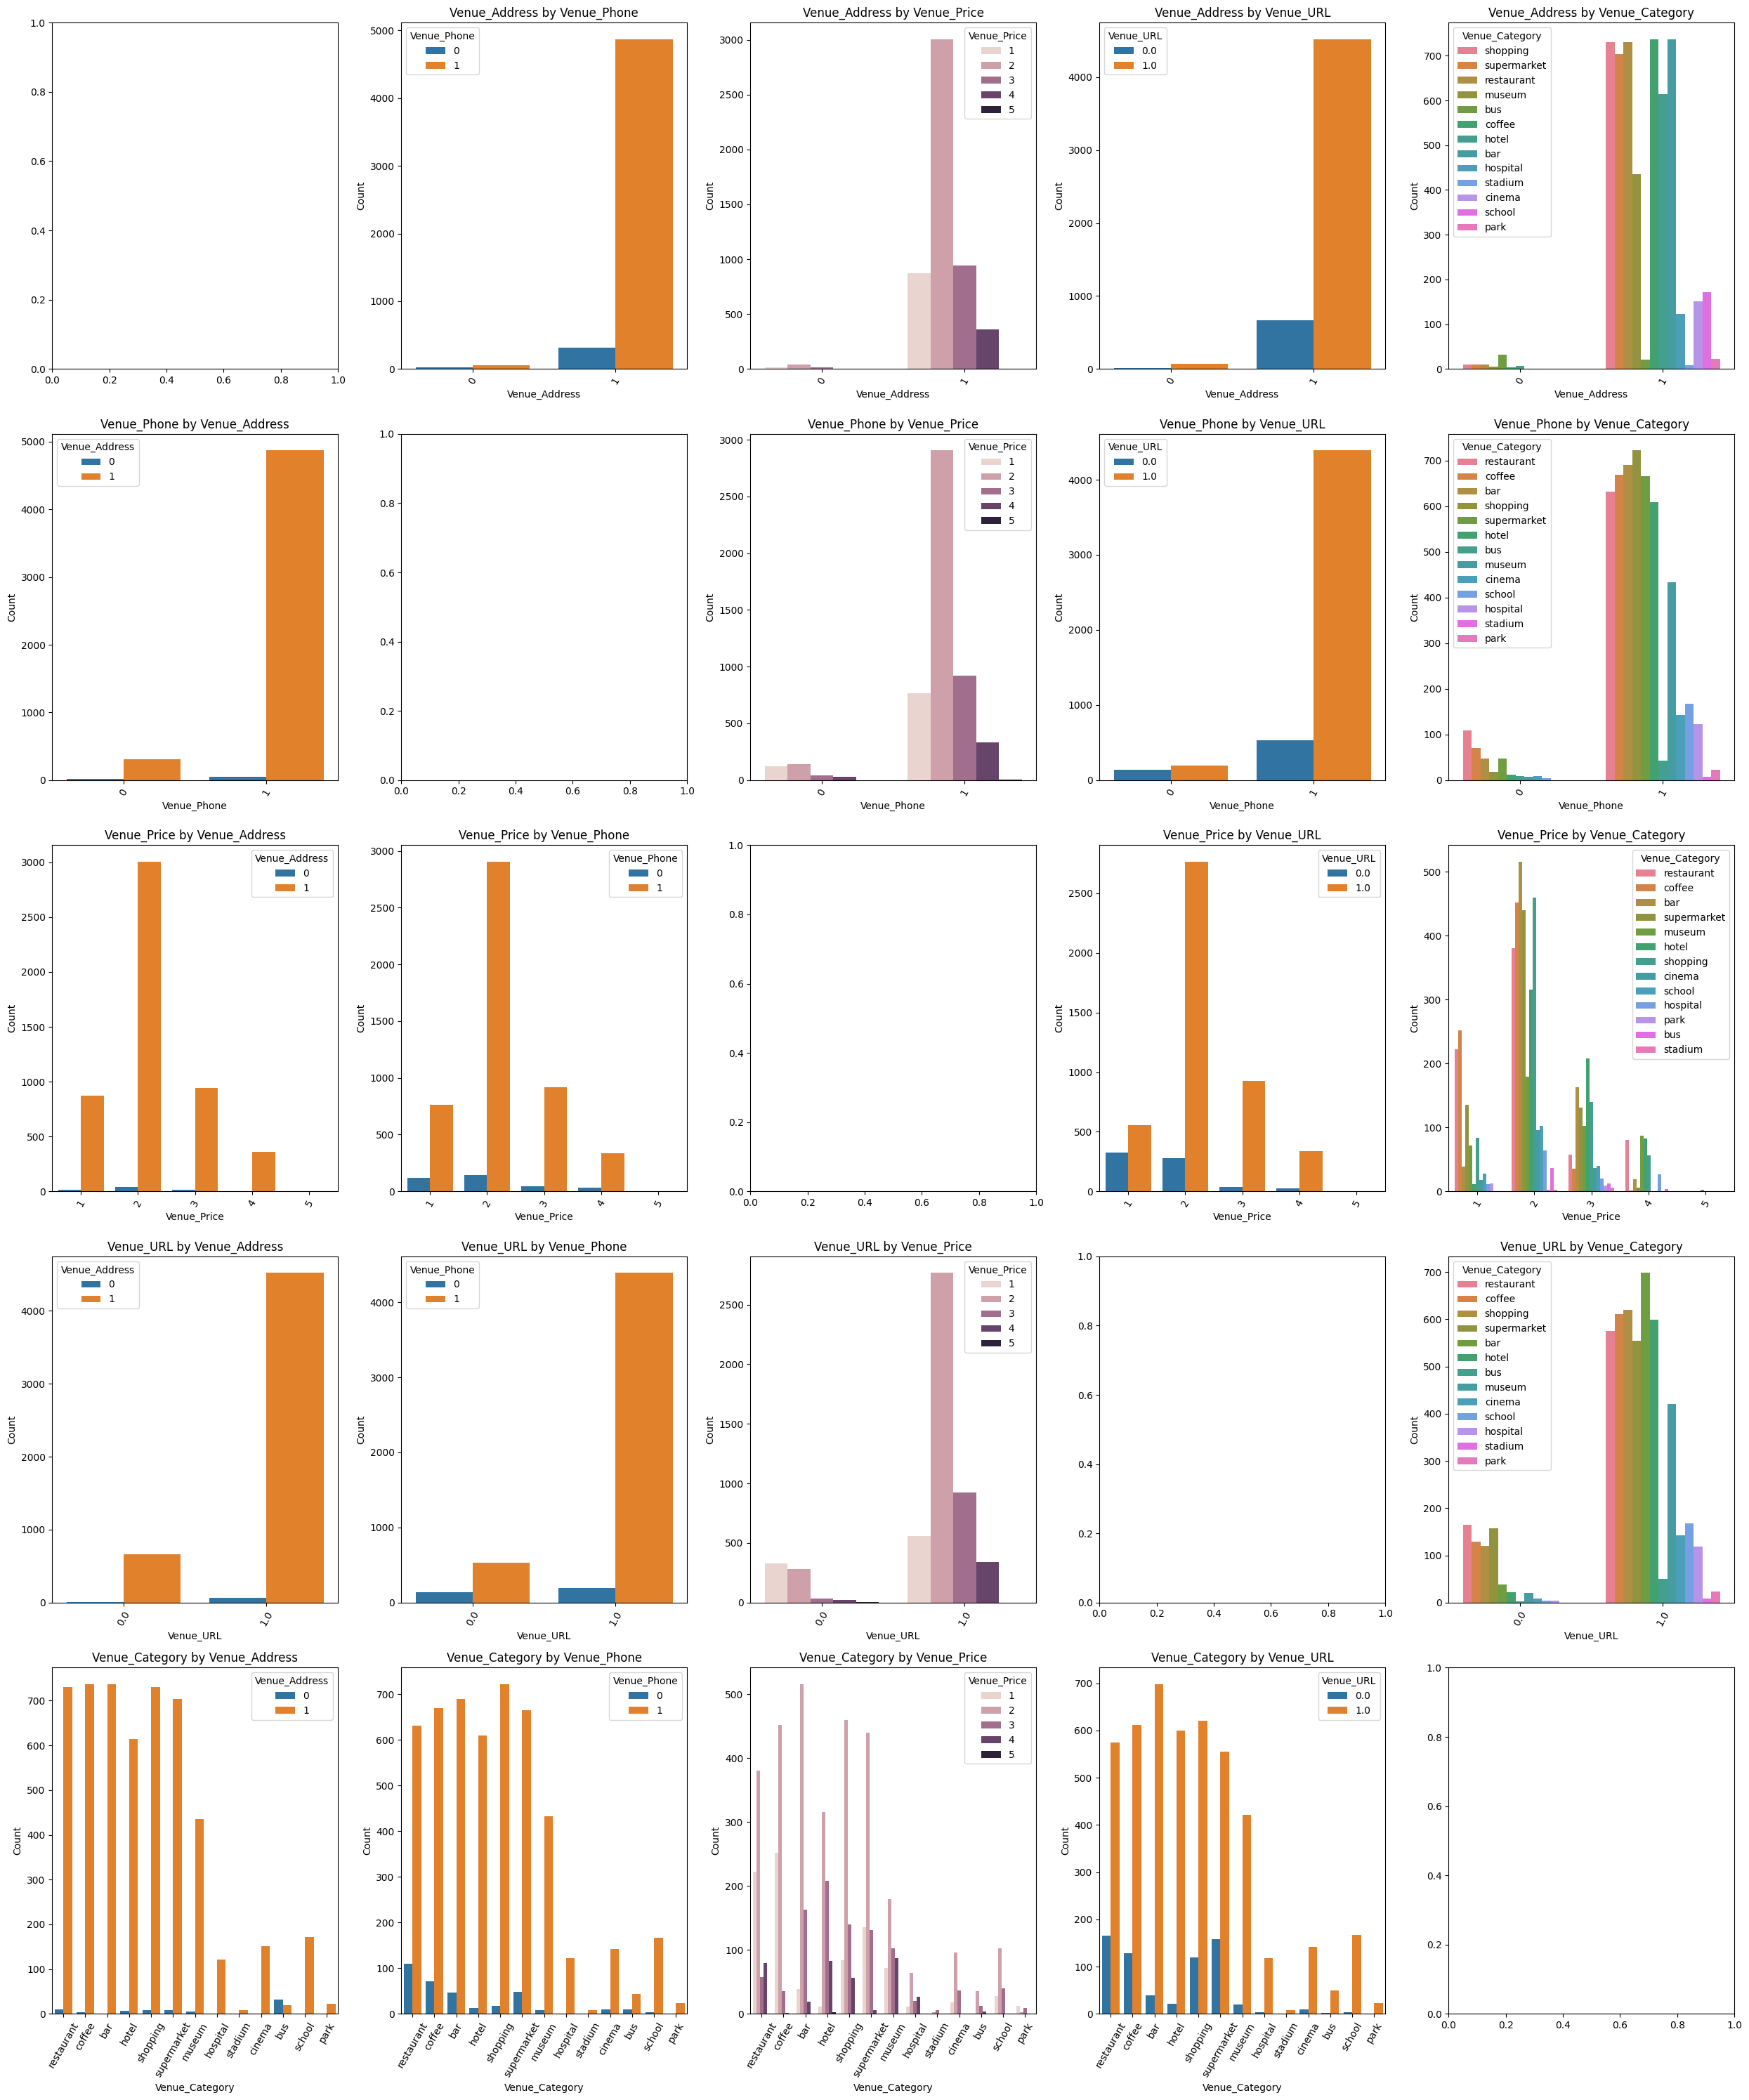

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_cross_barplot(dataframe, features):
    num_features = len(features)
    fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(25, 30))
    
    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            if i != j:  # Avoid drawing for the same variable
                sns.countplot(x=feature1, hue=feature2, data=dataframe, ax=axes[i, j])
                axes[i, j].set_title(f"{feature1} by {feature2}")
                axes[i, j].set_xlabel(feature1)
                axes[i, j].set_ylabel("Count")
                axes[i, j].legend(title=feature2)
                axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=60)
    # plt.suptitle("Bar chart for each categorical variable pair")
    plt.tight_layout()
    plt.show()

# Draw
draw_cross_barplot(df, cat_cols)

#### Comment:
Through the visualization above, it seems like that these variable pairs probably have relationships in each pair. However, it's not sure to define surely, so I am going to use Chi-Square hypothesis testing to check again as follows:

### Using Chi-square Test to check  for relationship of 2 categorical variables:
- H0: 2 categorical variables are independent.
- H1: 2 categorical variables has relationship.

In [38]:
from scipy import stats
# set the significance level
alpha = 0.05

In [39]:
cat_cols

['Venue_Address', 'Venue_Phone', 'Venue_Price', 'Venue_URL', 'Venue_Category']

In [40]:
print("Chi-square Test to check for relationship of")
print("-"*20)
print("-"*20)


for col in cat_cols:
    i = cat_cols.index(col)
    while i < len(cat_cols)-1:
        element1 = col
        element2 = cat_cols[i+1]
        
        print(f"'{element1}' and '{element2}' variables:")
        
        contingency = pd.crosstab(df[element1], df[element2])
        stat, p, dof, expected = stats.chi2_contingency(contingency)

        # final decision
        if p < alpha :
            print('p-value:' , p, '---> H0 is rejected ---> There is a RELATIONSHIP between these variables.')
        else:
            print('p-value:' , p, '---> H0 is not rejected ---> These two variables are INDEPENDENT.')
        print("-"*20)
        i=i+1

Chi-square Test to check for relationship of
--------------------
--------------------
'Venue_Address' and 'Venue_Phone' variables:
p-value: 8.483709642816675e-16 ---> H0 is rejected ---> There is a RELATIONSHIP between these variables.
--------------------
'Venue_Address' and 'Venue_Price' variables:
p-value: 1.1167954662390741e-45 ---> H0 is rejected ---> There is a RELATIONSHIP between these variables.
--------------------
'Venue_Address' and 'Venue_URL' variables:
p-value: 0.7374893494145452 ---> H0 is not rejected ---> These two variables are INDEPENDENT.
--------------------
'Venue_Address' and 'Venue_Category' variables:
p-value: 3.911752240734944e-288 ---> H0 is rejected ---> There is a RELATIONSHIP between these variables.
--------------------
'Venue_Phone' and 'Venue_Price' variables:
p-value: 2.4761135207111228e-21 ---> H0 is rejected ---> There is a RELATIONSHIP between these variables.
--------------------
'Venue_Phone' and 'Venue_URL' variables:
p-value: 9.939909721766093

#### Comment: The inital comment is almost correct except for 'Venue_Address' & 'Venue_URL' variable pair.

#### 

#### 4.2.2. Bivariate:  Categorical & Numerical

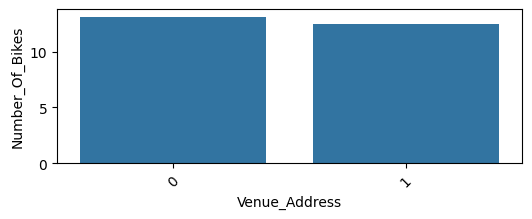

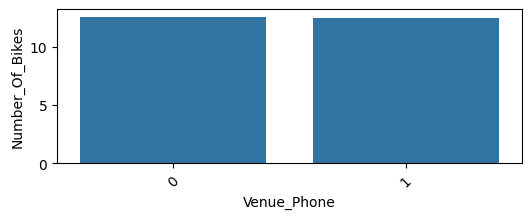

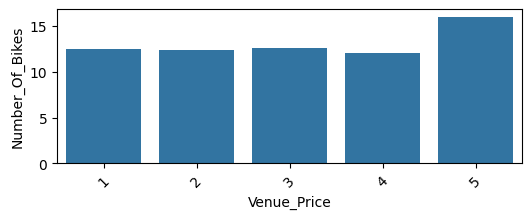

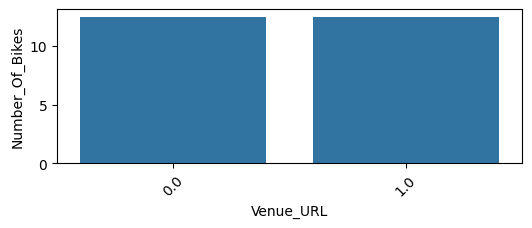

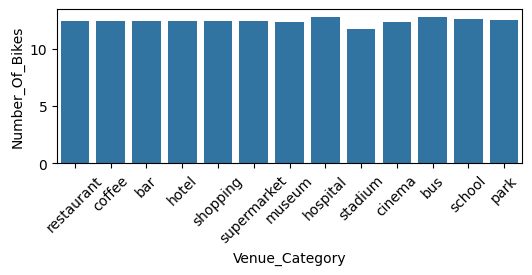

In [41]:
# Categorical & 'Number_Of_Bikes' feature

for col in cat_cols: 
    plt.figure(figsize=(6,2))
    sns.barplot(data=df, x=col, y='Number_Of_Bikes', ci=None)  
    plt.xticks(rotation=45)
    plt.show()

#### Comment:
- Through the visualization above, the averages seem close for the variable pairs between 'Number_Of_Bikes' variable and categorical variables.

- I am going to use Student's t-test and ANOVA hypothesis testing to check again as follows:

### Using Student's t-test to check  for relationship of numerical and categorical variables that has 2 categories:
- H0: no significant difference bewtween 2 Number_Of_Bikes'means of 2 categories of categorical variable.
- H1: significant difference.

(H<sub>0</sub>: averages are equal; H<sub>a</sub>: averages are not equal)

In [42]:
# # Draft in order to write a defined-function:

# df_test = df[['Number_Of_Bikes','Venue_Category']]

# df_test_restaurant = df_test[df_test['Venue_Category']=='restaurant']['Number_Of_Bikes']
# df_test_coffee = df_test[df_test['Venue_Category']=='coffee']['Number_Of_Bikes']

# stat, p = stats.ttest_ind(df_test_coffee, df_test_restaurant, equal_var=False)
# p

In [43]:
cat_cols

['Venue_Address', 'Venue_Phone', 'Venue_Price', 'Venue_URL', 'Venue_Category']

In [44]:
print("t-test for:")
print("-"*20)
print("-"*20)

for col in ['Venue_Address', 'Venue_Phone', 'Venue_URL']:
    print(f" '{col}' and 'Number_Of_Bikes' variables:")
    
    df_test = df[['Number_Of_Bikes', col]]
    category1 = df_test[col].unique()[0]
    category2 = df_test[col].unique()[1]
    
    df_test_category1 = df_test[df_test[col]==category1]['Number_Of_Bikes']
    df_test_category2 = df_test[df_test[col]==category2]['Number_Of_Bikes']

    stat, p = stats.ttest_ind(df_test_category1, df_test_category2, equal_var=False)

    # final decision
    if p < alpha :
        print("p-value:" , p, "---> H0 is rejected ---> significant difference bewtween 2 Number_Of_Bikes'means of 2 categories of categorical variable.")
    else:
        print("p-value:" , p, "---> H0 is not rejected ---> NO significant difference bewtween 2 Number_Of_Bikes'means of 2 categories of categorical variable.")
    print("-"*20)

t-test for:
--------------------
--------------------
 'Venue_Address' and 'Number_Of_Bikes' variables:
p-value: 0.24270758644300006 ---> H0 is not rejected ---> NO significant difference bewtween 2 Number_Of_Bikes'means of 2 categories of categorical variable.
--------------------
 'Venue_Phone' and 'Number_Of_Bikes' variables:
p-value: 0.6591277251654419 ---> H0 is not rejected ---> NO significant difference bewtween 2 Number_Of_Bikes'means of 2 categories of categorical variable.
--------------------
 'Venue_URL' and 'Number_Of_Bikes' variables:
p-value: 0.8021074595689184 ---> H0 is not rejected ---> NO significant difference bewtween 2 Number_Of_Bikes'means of 2 categories of categorical variable.
--------------------


### Using ANOVA test to check  for relationship of numerical and categorical variables that has more than 2 categories:
- H0: all averages are equal (no significant difference bewtween 3/13 Number_Of_Bikes' means of 3/13 categories of categorical variable).
- H1: one or more averages are not equal

In [45]:
print("ANOVA test for 'Number_Of_Bikes' & 'Venue_Price' :")
df_test = df[['Number_Of_Bikes','Venue_Price']]

df_test_price1 = df_test[df_test['Venue_Price']==1]['Number_Of_Bikes']
df_test_price2 = df_test[df_test['Venue_Price']==2]['Number_Of_Bikes']
df_test_price3 = df_test[df_test['Venue_Price']==3]['Number_Of_Bikes']
df_test_price4 = df_test[df_test['Venue_Price']==4]['Number_Of_Bikes']
df_test_price5 = df_test[df_test['Venue_Price']==5]['Number_Of_Bikes']

stat, p = stats.f_oneway(df_test_price1, df_test_price2, df_test_price3, df_test_price4, df_test_price5)

# final decision
if p < alpha :
    print("p-value:" , p, "---> H0 is rejected ---> one or more averages are not equal.")
else:
    print("p-value:" , p, "---> H0 is not rejected ---> all averages are equal (NO significant difference bewtween 3 Number_Of_Bikes' means of 3 categories of categorical variable).")

ANOVA test for 'Number_Of_Bikes' & 'Venue_Price' :
p-value: 0.32742865753876144 ---> H0 is not rejected ---> all averages are equal (NO significant difference bewtween 3 Number_Of_Bikes' means of 3 categories of categorical variable).


In [46]:
print("ANOVA test for 'Number_Of_Bikes' & 'Venue_Category' :")
df_test = df[['Number_Of_Bikes','Venue_Category']]
types  = df['Venue_Category'].unique()

df_test_category0 = df_test[df_test['Venue_Category']==types[0]]['Number_Of_Bikes']
df_test_category1 = df_test[df_test['Venue_Category']==types[1]]['Number_Of_Bikes']
df_test_category2 = df_test[df_test['Venue_Category']==types[2]]['Number_Of_Bikes']
df_test_category3 = df_test[df_test['Venue_Category']==types[3]]['Number_Of_Bikes']
df_test_category4 = df_test[df_test['Venue_Category']==types[4]]['Number_Of_Bikes']
df_test_category5 = df_test[df_test['Venue_Category']==types[5]]['Number_Of_Bikes']
df_test_category6 = df_test[df_test['Venue_Category']==types[6]]['Number_Of_Bikes']
df_test_category7 = df_test[df_test['Venue_Category']==types[7]]['Number_Of_Bikes']
df_test_category8 = df_test[df_test['Venue_Category']==types[8]]['Number_Of_Bikes']
df_test_category9 = df_test[df_test['Venue_Category']==types[9]]['Number_Of_Bikes']
df_test_category10 = df_test[df_test['Venue_Category']==types[10]]['Number_Of_Bikes']
df_test_category11 = df_test[df_test['Venue_Category']==types[11]]['Number_Of_Bikes']
df_test_category12 = df_test[df_test['Venue_Category']==types[12]]['Number_Of_Bikes']

stat, p = stats.f_oneway(df_test_category0, df_test_category1, df_test_category2, df_test_category3, df_test_category4, 
                             df_test_category5, df_test_category6, df_test_category7, df_test_category8, df_test_category9,
                             df_test_category10, df_test_category11, df_test_category12)

# final decision
if p < alpha :
    print("p-value:" , p, "---> H0 is rejected ---> one or more averages are not equal.")
else:
    print("p-value:" , p, "---> H0 is not rejected ---> all averages are equal (NO significant difference bewtween 13 Number_Of_Bikes' means of 13 categories of categorical variable).")

ANOVA test for 'Number_Of_Bikes' & 'Venue_Category' :
p-value: 0.9999381286192898 ---> H0 is not rejected ---> all averages are equal (NO significant difference bewtween 13 Number_Of_Bikes' means of 13 categories of categorical variable).


#### Comment:  The inital comment is correct.

####

#### 4.2.3. Bivariate: Numerical & Numerical

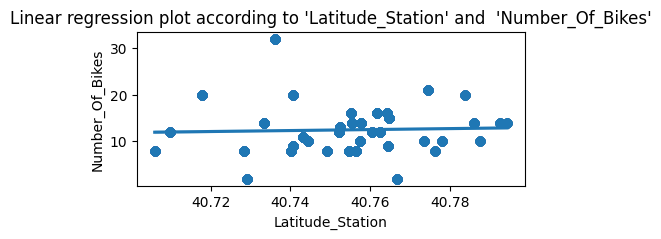

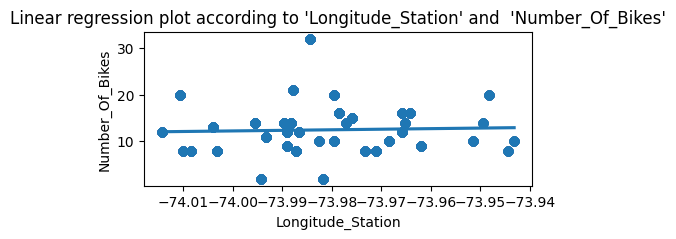

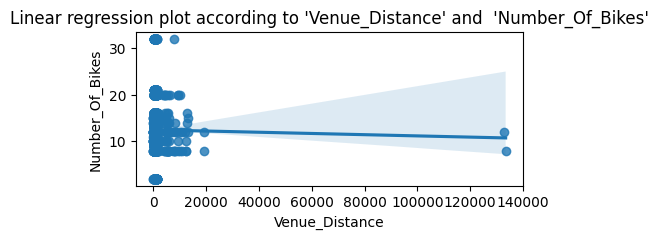

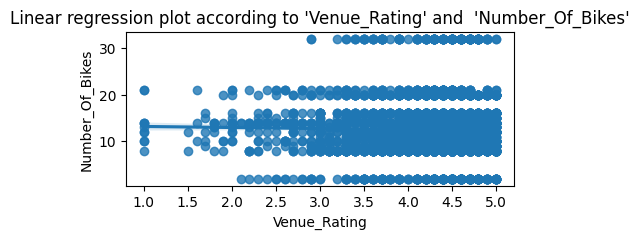

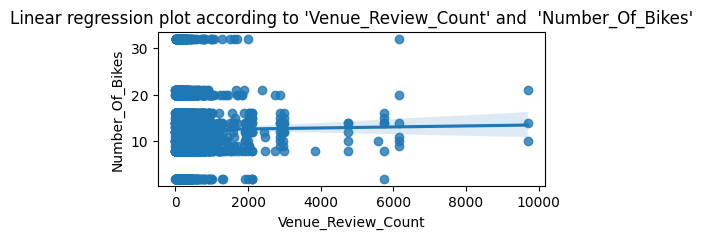

In [47]:
# Other numerical & 'Number_Of_Bikes' variable

for col in numerical_cols:
    if col!='Number_Of_Bikes':
        plt.figure(figsize=(5,2))
        sns.regplot(data=df, x=col, y='Number_Of_Bikes')
        plt.title(f"Linear regression plot according to '{col}' and  'Number_Of_Bikes'")
        plt.show()

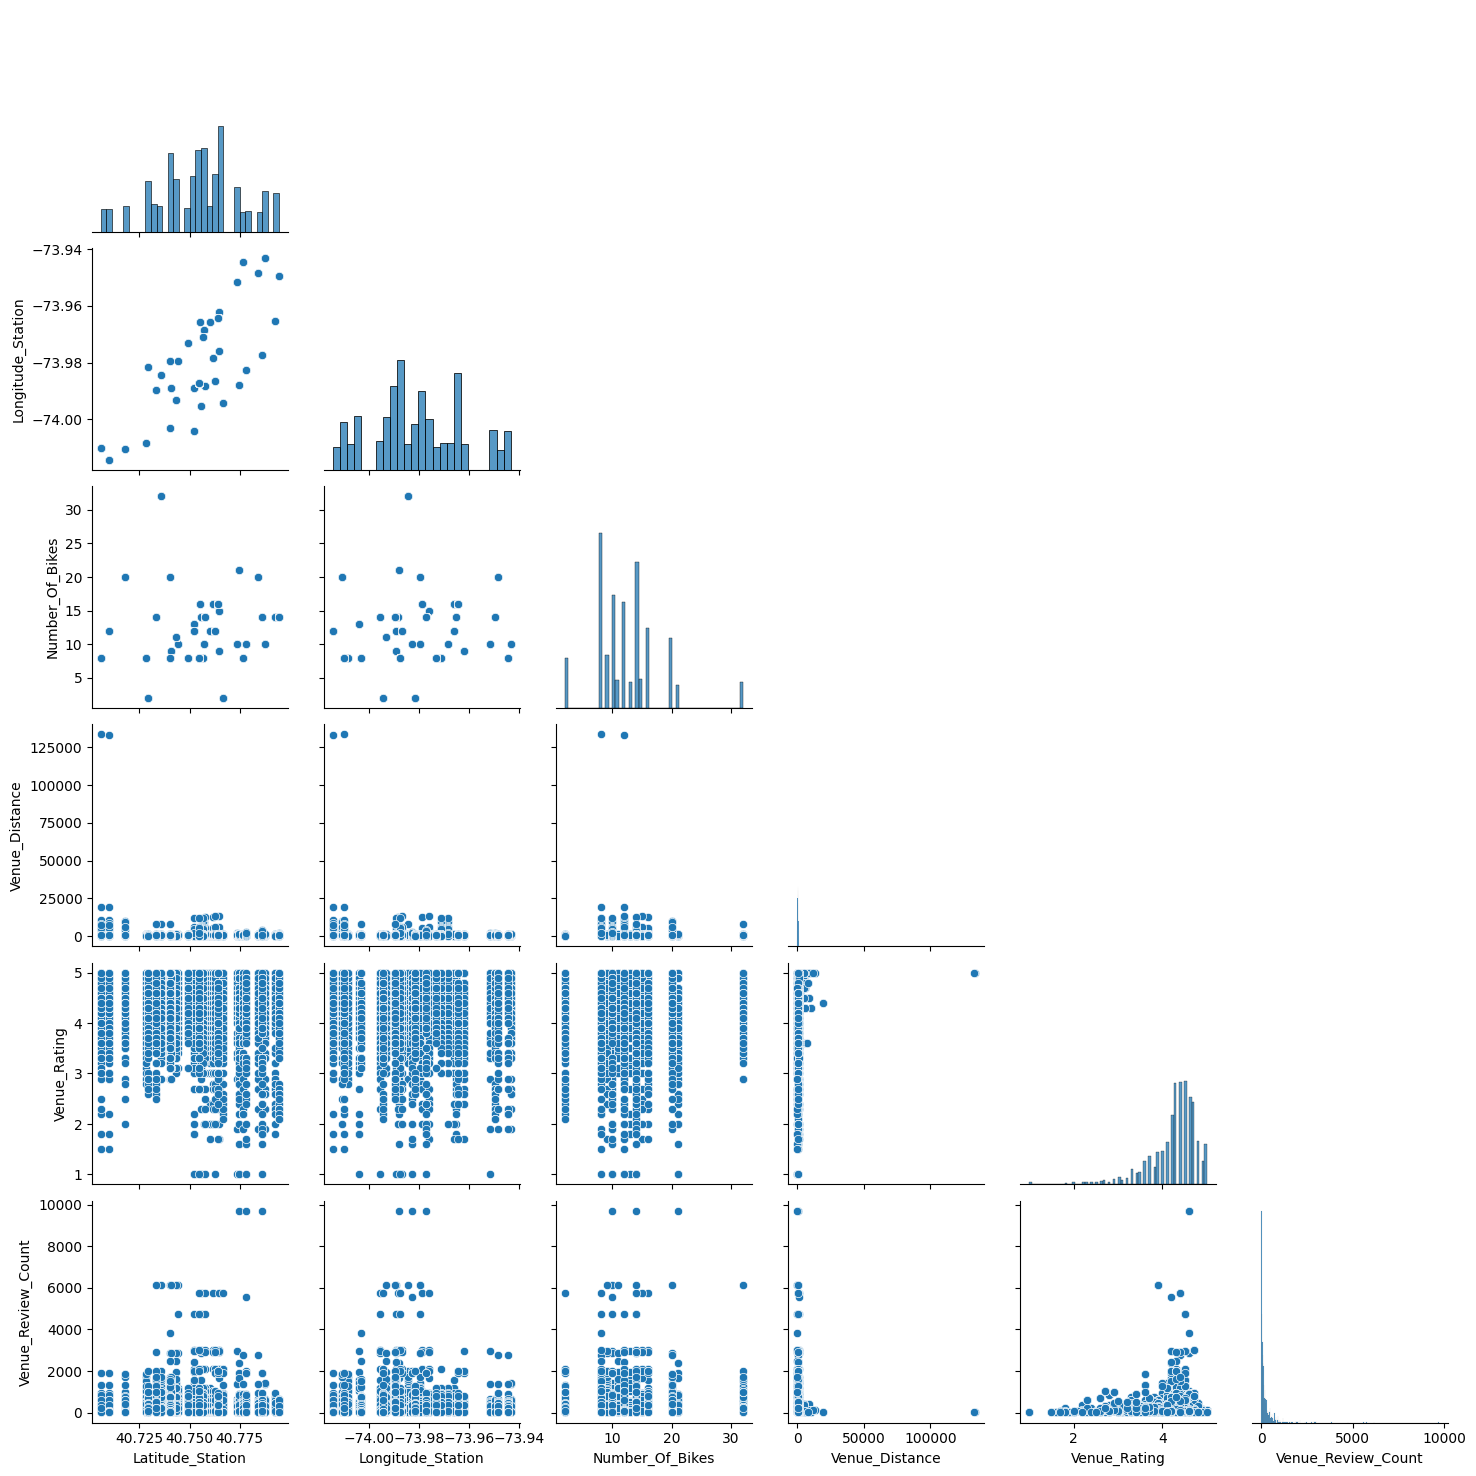

In [48]:
#Let's use seaborn's `pairplot` to informally check if there is linearity between the numerical variables

sns.pairplot(data=df[numerical_cols],corner=True)
plt.show()

### Comment: 
According to 2 results above, it seems like all these numerical variables are not strongly correlated with one another. Let's check this by looking at the correlations.

In [49]:
df[numerical_cols].corr()
# df.corr(numeric_only=True)

,Latitude_Station,Longitude_Station,Number_Of_Bikes,Venue_Distance,Venue_Rating,Venue_Review_Count
Latitude_Station,1.000000,0.740011,0.039063,-0.070444,-0.060695,-0.026122
Longitude_Station,0.740011,1.000000,0.039943,-0.056171,0.015142,-0.068490
Number_Of_Bikes,0.039063,0.039943,1.000000,-0.006572,-0.023370,0.010558
Venue_Distance,-0.070444,-0.056171,-0.006572,1.000000,0.049817,-0.019578
Venue_Rating,-0.060695,0.015142,-0.023370,0.049817,1.000000,-0.008500
Venue_Review_Count,-0.026122,-0.068490,0.010558,-0.019578,-0.008500,1.000000


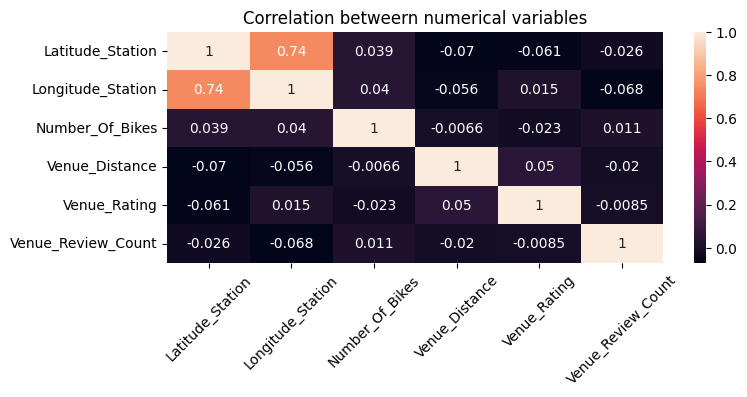

In [50]:
plt.figure(figsize = (8,3))
sns.heatmap(df[numerical_cols].corr(), annot = True)       #, cmap="RdYlGn"
plt.xticks(rotation=45)
plt.title("Correlation betweern numerical variables")
plt.show()

### Comment: 
Indeed, all these numerical variables are not correlated with one another, except for Latitude_Station & Longitude_Station variable pair.

### Remove outliers
Now I decide to remove the outliers from our dataset. I am going to remove all 
1. observations that Venue_Distance are more than 2,000 meters.
2.  observations that have more than 3,500 of riew_count and rating greater than 3.8:

In [51]:
print("Shape of dataframe df before removing outliers:", df.shape)

Shape of dataframe df before removing outliers: (5259, 14)


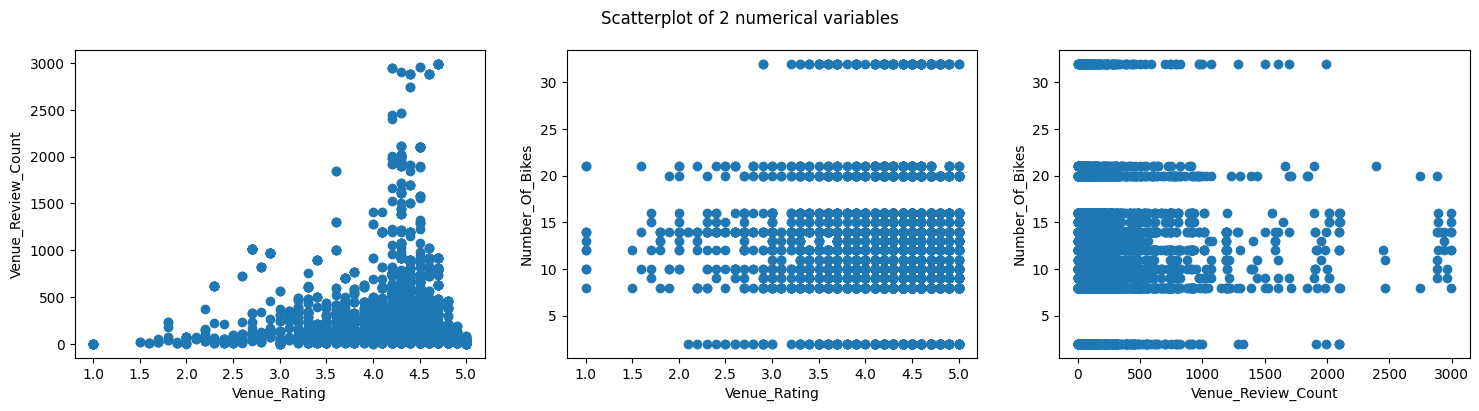

In [52]:
# delete outliers
df = df.drop(df[(df['Venue_Distance']>2000)].index)
df = df.drop(df[(df['Venue_Rating']>3.8) & (df['Venue_Review_Count']>3500)].index)

# reset index
df = df.reset_index(drop=True)



# check the graphic again
fig, ax = plt.subplots(1,3, figsize=(18,4))

ax[0].scatter(df['Venue_Rating'], df['Venue_Review_Count'])
ax[0].set_xlabel('Venue_Rating', fontsize=10)
ax[0].set_ylabel('Venue_Review_Count', fontsize=10)


ax[1].scatter(df['Venue_Rating'], df['Number_Of_Bikes'])
ax[1].set_xlabel('Venue_Rating', fontsize=10)
ax[1].set_ylabel('Number_Of_Bikes', fontsize=10)

ax[2].scatter(df['Venue_Review_Count'], df['Number_Of_Bikes'])
ax[2].set_xlabel('Venue_Review_Count', fontsize=10)
ax[2].set_ylabel('Number_Of_Bikes', fontsize=10)

plt.suptitle('Scatterplot of 2 numerical variables')
plt.show()


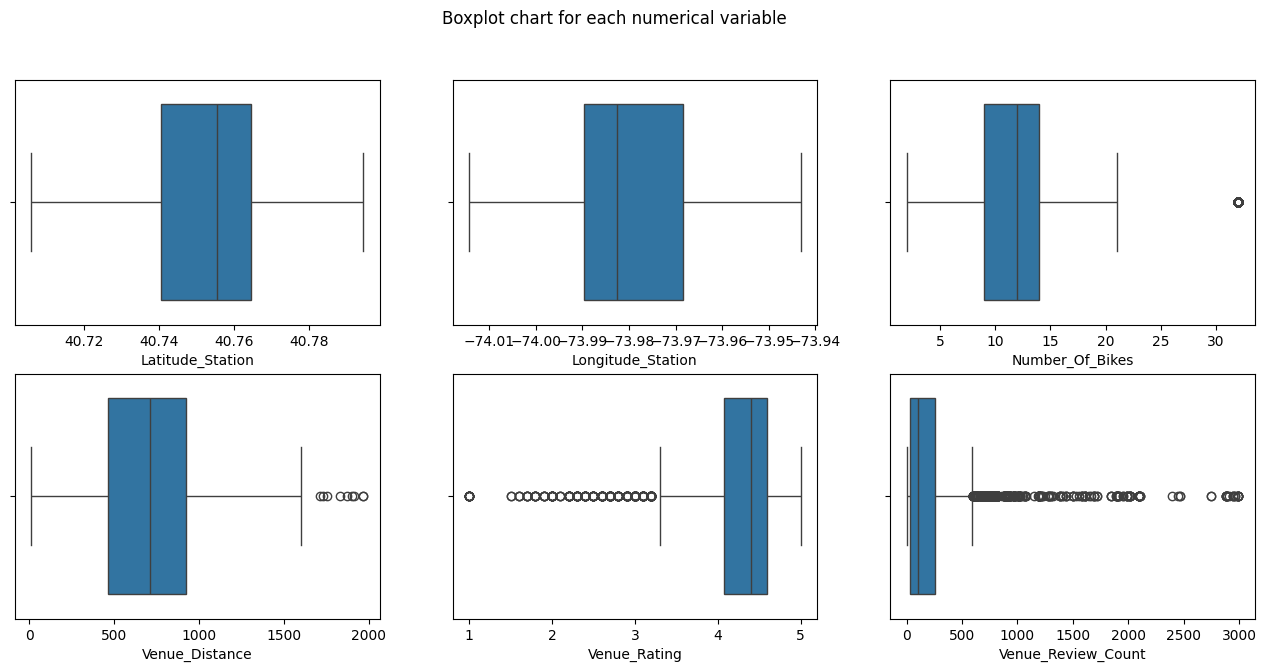

In [53]:
# Draw boxplot again to check  
draw_boxplot_univariate(df, numerical_cols, 2, 3)

In [54]:
print("Shape of dataframe df after removing outliers:", df.shape)

Shape of dataframe df after removing outliers: (5152, 14)


### Note:
Will come back if model is not good.

In [55]:
# def remove_outliers(df, column_name, lower_percentile=0.25, upper_percentile=0.75, threshold=1.5):
#     Q1 = df[column_name].quantile(lower_percentile)
#     Q3 = df[column_name].quantile(upper_percentile)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - threshold * IQR
#     upper_bound = Q3 + threshold * IQR
#     return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# for col in numerical_cols:
#     df = remove_outliers(df, col)
    
# df  = df.reset_index(drop=True)   
# df.shape

# plt.figure(figsize=(8,4))
# sns.boxplot(data=df[numerical_cols])
# plt.xticks(rotation=45)
# plt.show()

###  Store df in csv file

In [56]:
df.to_csv('../data/bike_stations_with_pois.csv', index=False)

#

# C - Loading data into a database 

### 1. Create/Connect to Database server using sqlite3

In [57]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

# creates a connection to the SQLite database
connection = create_connection("../data/bikeproject_database.sqlite")  


Connection to SQLite DB successful


### 2. Create Tables inside database

#### I am going to create 3 tables inside `bikeproject_database` database: `Bike_Stations`, `Venues`, `Station_Venues`table as follows:

In [58]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")


In [59]:
# Generate Bike_Stations table:

create_Bike_Stations_table = """
CREATE TABLE IF NOT EXISTS Bike_Stations (
                               id           INTEGER  PRIMARY KEY AUTOINCREMENT,
                               Name_Station         TEXT  NOT NULL,
                               Latitude_Station     FLOAT,
                               Longitude_Station    FLOAT,
                               Number_Of_Bikes      INTEGER
);
"""
execute_query(connection, create_Bike_Stations_table)  

Query executed successfully


In [60]:
# Generate Venues table:

create_Venues_table = """
CREATE TABLE IF NOT EXISTS  Venues (
                               id        INTEGER  PRIMARY KEY AUTOINCREMENT,
                               venue_name            TEXT  NOT NULL,
                               venue_category        TEXT,
                               venue_subcategory     TEXT,
                               venue_address         TEXT,
                               venue_phone           TEXT,
                               venue_price           TEXT,
                               venue_rating          FLOAT,
                               venue_review_count    FLOAT,
                               venue_url             TEXT
);
"""
execute_query(connection, create_Venues_table)  

Query executed successfully


In [61]:
# Generate Station_Venues table:

create_Station_Venues_table = """
CREATE TABLE IF NOT EXISTS   Station_Venues (
                               id              INTEGER  PRIMARY KEY AUTOINCREMENT,
                               name_station    TEXT,
                               venue_name      TEXT,
                               venue_distance  FLOAT,
                               FOREIGN KEY (name_station) REFERENCES Bike_Stations (name_station)
                               FOREIGN KEY (venue_name) REFERENCES Venues (venue_name)
);
"""
execute_query(connection, create_Station_Venues_table)  

Query executed successfully


### 3. Prepare data for tables

* **Prepare data for Bike_Stations tables**:

In [62]:
df1.shape     

(37, 4)

In [63]:
df1.columns  # cannot use this df1 because it hasn't been handled missing values  yet.

Index(['Name_Station', 'Latitude_Station', 'Longitude_Station',
       'Number_Of_Bikes'],
      dtype='object')

In [64]:
df_stations = df_joined[df1.columns].drop_duplicates()
df_stations.shape       # 37 unique bike stations

(37, 4)

*  **Prepare data for Venues table**:

In [65]:
df2.shape

(5259, 11)

In [66]:
df2.columns  # cannot use this df2 because it hasn't been handled missing values  yet.

Index(['Name_Station', 'Venue_Name', 'Venue_Address', 'Venue_Distance',
       'Venue_Phone', 'Venue_Rating', 'Venue_Price', 'Venue_Review_Count',
       'Venue_URL', 'Venue_Subcategory', 'Venue_Category'],
      dtype='object')

In [67]:
df_venues = df_joined[df2.columns].drop(['Name_Station','Venue_Distance'], axis=1).drop_duplicates()

print(df_venues.shape)
df_venues.head(3)      # 1838 unique venues

(1838, 9)


,Venue_Name,Venue_Address,Venue_Phone,Venue_Rating,Venue_Price,Venue_Review_Count,Venue_URL,Venue_Subcategory,Venue_Category
0,Village Crown Kosher Catering,216 E 49th St,(212) 207-3888,4.9,$$,9,http://www.villagecrown.com,Caterers,restaurant
1,Charoen Krung,955 2nd Ave,(929) 789-9456,4.8,$$,121,http://www.charoenkrungnyc.com,Thai,restaurant
2,Quick Stop,47th Street & Lexington Ave,(917) 577-7057,4.8,$,9,http://georzes.wix.com/quickshop1,Coffee & Tea,restaurant


* **Prepare data for Station_Venues tables**:

In [68]:
df_station_venues = df_joined[['Name_Station', 'Venue_Name','Venue_Distance']]
df_station_venues.shape

(5259, 3)

### 4. Insert Record into table

In [69]:
# Insert records to Bike_Stations table:
df1.to_sql('Bike_Stations', connection, if_exists='replace', index=False)

# Insert records to Venues table:
df_venues.to_sql('Venues', connection, if_exists='replace', index=False)

# Insert records to Station_Venues table:
df_station_venues.to_sql('Station_Venues', connection, if_exists='replace', index=False)

5259

In [70]:
# Close connection
connection.close()

### 5. Validate the data.

To validate data in the Bike_Stations, Venues, and Station_Venues tables after generating, I perform the following checks:

1. Check **data existence**: Make sure the tables are not empty and have data in them.
2. Check **duplicates**: check to see if tables have duplicated rows
3. Check **missing values**: check to see if there is something wrong regarding missing values.

In [71]:
# Connect to the SQLite3 database again
connection = sqlite3.connect('../data/bikeproject_database.sqlite')
cursor = connection.cursor()

# List of tables to check
tables = ['Bike_Stations', 'Venues', 'Station_Venues']

In [72]:
# Check for data existence:

for table in tables:
    # Check number of rows
    cursor.execute(f"SELECT COUNT(*) FROM {table}")
    count = cursor.fetchone()[0]
    
    # Check number of columns
    cursor.execute(f"PRAGMA table_info({table})")
    columns = cursor.fetchall()
    num_columns = len(columns)

    print(f"Table  {table}  has: {num_columns} columns with {count} records.")

Table  Bike_Stations  has: 4 columns with 37 records.
Table  Venues  has: 9 columns with 1838 records.
Table  Station_Venues  has: 3 columns with 5259 records.


**Comment**:
- Table `Station_Venues` is likely table after joining.
Table `Bike_Stations` and  `Venues` are sources to join.
- Each bus station can have many venues (of POIs) and each venues also connect to many different bus stations (Many-to-many relationship)

In [73]:
# Check for duplicates:

for table in tables:
    print("Table", table, ":")
    cursor.execute("""
                    SELECT 'QA_duplicate_rows' AS qa_test_name,
                           (CASE WHEN (SELECT COUNT(*)  FROM  (SELECT DISTINCT * FROM Bike_Stations)) --this returns 'unique_rows_count' 
                    		        = (SELECT COUNT(*)  FROM  Bike_Stations)                          --this returns 'total_rows_count' 
                    		     THEN 'pass'
                            	 ELSE 'fail'
                             END) AS qa_result
                    """)
    result = cursor.fetchone()
    print(result)
    print('-'*10)

Table Bike_Stations :
('QA_duplicate_rows', 'pass')
----------
Table Venues :
('QA_duplicate_rows', 'pass')
----------
Table Station_Venues :
('QA_duplicate_rows', 'pass')
----------


In [74]:
# Draft for using below checking:
cursor.execute('PRAGMA table_info(Bike_Stations)')
list_columns = cursor.fetchall()
list_columns

[(0, 'Name_Station', 'TEXT', 0, None, 0),
 (1, 'Latitude_Station', 'REAL', 0, None, 0),
 (2, 'Longitude_Station', 'REAL', 0, None, 0),
 (3, 'Number_Of_Bikes', 'INTEGER', 0, None, 0)]

In [75]:
# Check for missing values :

for table in tables:
    print("Table", table, ":")
    
    cursor.execute(f'PRAGMA table_info({table})')
    list_columns = cursor.fetchall()
    
    for column in list_columns:
        print("Column ", column[1], ": ",  end="")
        cursor.execute(f"""
                        SELECT COUNT(*) AS num_missing_values
                        FROM {table}
                        WHERE {column[1]} IS NULL
                       """)
        result = cursor.fetchone()[0]
        print(result, "missing value(s)")
    print('-'*10)

Table Bike_Stations :
Column  Name_Station : 0 missing value(s)
Column  Latitude_Station : 0 missing value(s)
Column  Longitude_Station : 0 missing value(s)
Column  Number_Of_Bikes : 0 missing value(s)
----------
Table Venues :
Column  Venue_Name : 0 missing value(s)
Column  Venue_Address : 0 missing value(s)
Column  Venue_Phone : 0 missing value(s)
Column  Venue_Rating : 0 missing value(s)
Column  Venue_Price : 0 missing value(s)
Column  Venue_Review_Count : 0 missing value(s)
Column  Venue_URL : 0 missing value(s)
Column  Venue_Subcategory : 0 missing value(s)
Column  Venue_Category : 0 missing value(s)
----------
Table Station_Venues :
Column  Name_Station : 0 missing value(s)
Column  Venue_Name : 0 missing value(s)
Column  Venue_Distance : 0 missing value(s)
----------


**Comment**:
Thanks for this step, I could check to make sure my data was stored in database correctly as I expected or not.

In [76]:
# TEST for showing data in 'Bike_Stations' table
query = "SELECT * FROM Bike_Stations LIMIT 8"
cursor.execute(query)
results = cursor.fetchall()
results

[('Icon Pkg: E 52 St, 1st Ave & 2nd Ave', 40.755226, -73.965826, 16),
 ('Icon Pkg: W 29 St, 11th Ave & 10th Ave', 40.752384, -74.00396, 13),
 ('Icon Pkg: E 27 St, 2nd Ave & 3rd Ave', 40.740531, -73.979577, 20),
 ('Icon Pkg: King Street & Greenwich St', 40.728319, -74.008412, 8),
 ('Icon Pkg: W 97 St, Cntrl Park W & Col.', 40.792596, -73.965278, 14),
 ('Quik Park: 81 St, 1st & York', 40.773513, -73.951505, 10),
 ('Icon Pkg: W 64 St, Ams. & West E.', 40.774623, -73.987749, 21),
 ('Icon Pkg: E 102 St, 1st Ave & 2nd Ave', 40.787629, -73.943185, 10)]

In [77]:
# TEST for showing data in 'Venues' table
query = "SELECT * FROM Venues LIMIT 1"
cursor.execute(query)
results = cursor.fetchall()
results

[('Village Crown Kosher Catering',
  '216 E 49th St',
  '(212) 207-3888',
  4.9,
  '$$',
  9,
  'http://www.villagecrown.com',
  'Caterers',
  'restaurant')]

In [78]:
# TEST for showing data in 'Station_Venues' table
query = "SELECT * FROM Station_Venues LIMIT 5"
cursor.execute(query)
results = cursor.fetchall()
results

[('Icon Pkg: E 52 St, 1st Ave & 2nd Ave',
  'Village Crown Kosher Catering',
  401.3791707065456),
 ('Icon Pkg: E 52 St, 1st Ave & 2nd Ave', 'Charoen Krung', 227.25238688478825),
 ('Icon Pkg: E 52 St, 1st Ave & 2nd Ave', 'Quick Stop', 672.8227154763755),
 ('Icon Pkg: E 52 St, 1st Ave & 2nd Ave', 'Kati Shop', 495.560320113011),
 ('Icon Pkg: E 52 St, 1st Ave & 2nd Ave',
  "Tony's Coffee Cart",
  732.2069668384418)]

In [79]:
# Close the connection
connection.close()

# D - Look at the data before and after the join to validate the data.
(This requirement exists here in this notebook at the begining as template, but the meaning makes me confused with validating data in database section)
Anyway,

In section B (EDA) I did validate data after joining, such as:
1. Check shape (number of rows and columns of dataframe before and after joining)
2. Check duplicates
3. Check missing values
4. Check invalid values
5. Check data types